![title](http://portal.fbuni.edu.br/images/FB-UNI-colorida-300px.png)

# Trabalho de Inteligência Artificial

* **Prof. Cleilton Lima Rocha**
* **email:** climarocha@gmail.com
* **deadline: 13/04 às 23:59h**


Para este trabalho vamos usar o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic).  

Vamos criar um modelo de classificação de sobreviventes e não sobreviventes utilizando a implementação da Árvore de Decisões e Random Fortest em Python para classificação. Mas antes disso vamos realizar algumas atividades, tais como EDA (Exploração de Dados) e o processo de pré-processamento dos dados.


## O Dicionário de Dados

**Survival**: Sobrevivente (Não=0,Sim=1)
**Pclass**: Classe de ingresso (1=1st,2=2nd,3=3rd)
**Sex**: Sexo
**Age**: Idade em anos
**Sibsp**: Quantidade de irmãos ou cônjuge a bordo do Titanic
**Parch**: Quantidade de pais ou filhos a bordo do Titanic
**Ticket**: Número do ticket
**Fare**: Tarifa do passageiro
**Cabin**: Número da cabine	
**Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)

Boa trabalho e hands on!

**PS.:**
* Se houver indícios de cola os alunos poderão ter o seu trabalho zerado.
* O trabalho poderá ser realizado por no máximo 2 pessoas.
* Quando houver necessidade de splitar os dados aplique a proporção 70 para treino e 30 para teste
* Quando houver necessidade de utilizar o random_state defina o valor 100
* O título do email deve ser "Trabalho de IA - Turma 2020.1  - [Membros da equipe]"
* Envie o código fonte e o report (File ==> Download As ==> Html), com o nome dos membros da equipe, para meu email, climarocha@gmail.com até o dia **13/04 às 23:59h**.

## Import as bibliotecas
Vamos importar algumas bibliotecas para começar!

In [181]:
#Importando o dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Acessando os dados

Vamos iniciar lendo os dados através do pandas

- Utilizearemos a função **pd.read_csv** para ler o dado e salve na variável **data**
- O nome do dataset é **titanic_train.csv**
- Visualize alguns elementos do seu data set, para isto use **data.head()**

In [182]:
df = pd.read_csv('C:/Users/Ernesto/trabalho_v1_classificacao/dataset/titanic_train.csv')

In [183]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [184]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [185]:
df['Ticket'][0:2]

0    A/5 21171
1     PC 17599
Name: Ticket, dtype: object

In [186]:
df['Survived'][0:2]

0    0
1    1
Name: Survived, dtype: int64

## Pré-processamento dos dados


#### Preenchimento do atributo idade

P.S.: Queremos preencher os dados que faltam em algumas amostras para o atributo Idade. 
Uma maneira de fazer isso é preencher com o valor da idade mediana de todos os passageiros ou realizarmos um filtro pela classe e considerarmos a mediana por classe. Selecione uma das opções e preencha o atributo.

P.S.: Dependo da escolha vc pode usar as funções fillna() ou apply()

In [187]:
print(df.describe()) 
#Utilizando a função describe para obter dados do data set e ter uma noção dos numeros, valores, medias ete 
#Exemplo media da idade é 29 anos
#Se os dados estao dispersos ou não e etc

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


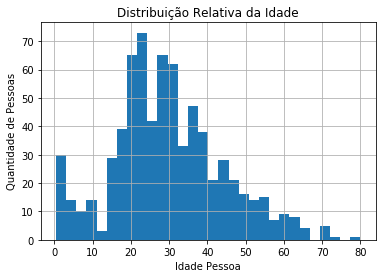

In [188]:
#Confirmar atraves de uma visualização como os dados estão dispostos atraves de uma media de idade
# histograma
df.Age.hist(bins = 30)
plt.xlabel("Idade Pessoa")
plt.ylabel("Quantidade de Pessoas")
plt.title("Distribuição Relativa da Idade")
plt.show()

In [189]:
#Verificação agora usando codifo para ter certeza
df.isnull().values.any()

True

In [190]:
#Indicação True realmente confirma que existem valores missing

In [191]:
#Verificando os dados nulos para serem tratados
#pd.isnull(df) verificando o data set inteiro
pd.isnull(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [192]:
#Olhando o conjunto de dados é possivel perceber que alguns dados além da idade precisam ser tratados 
#porem vamos nos concentrar somente no conjunto de dados de idade como a questao pedia

In [193]:
pd.isnull(df["Age"])

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [194]:
print(df.describe())
#Media da idade: Age; 29.699118 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [195]:
#Em uma analise exploratoria fazendo a contagem total de linhas do Data Frame e fazendo uma analise detalhada e exploratoria
#de cada tipo de dado faltante em quantidade sobreviventes e mortos
#Utilizando como ideia contagem de linhas contendo determinado valor
#total de 549 nao sobreviventes - 891 -> 342
print("# Quantidade de rows no dataframe {0}".format(len(df)))
print("# Survived 'Zero Não': {0}".format(len(df.loc[df['Survived'] == 0])))

# Quantidade de rows no dataframe 891
# Survived 'Zero Não': 549


In [196]:
#tratando valores missing ------- inicio do tratamento
# importando preprocessador do pactoe para então dizer os valores faltantes para então serem substituidos
import sklearn as sk
from sklearn.preprocessing import Imputer

In [197]:
# Criando objeto para substituição dos valores que faltam pela media, eles serao posterirmente inseridos dessa maneira
# nos dados de treino
preenche_Idade = Imputer(missing_values=np.nan,strategy='mean', axis = 0)


# Substituindo os valores iguais a zero, pela média dos dados (Sera mostrado mais a frente)
#X_treino = preenche_0.fit_transform(X_treino)
#X_teste = preenche_0.fit_transform(X_teste)

#### Remova os seguintes atributos: Name, Ticket, PassengerId e Cabin
 *Dica:* use a função drop, por exemplo, df.drop(['colunas'],axis=1,inplace=True)

In [201]:
#removendo a coluna apenas comentada porque quando ja removida da erro
df.drop(['Name'],axis=1,inplace=True)

In [202]:
#removendo a coluna apenas comentada porque quando ja removida da erro
df.drop(['Ticket'],axis=1,inplace=True)

In [203]:
#removendo a coluna apenas comentada porque quando ja removida da erro
df.drop(['PassengerId'],axis=1,inplace=True)

In [204]:
#removendo a coluna apenas comentada porque quando ja removida da erro
df.drop(['Cabin'],axis=1,inplace=True)

In [205]:
#Nova Estrutura do DataSet (Data Frame tratado)
df.fillna(value=29.7)
#inserindo o valor 29.7 por ser a media arredonda do valor entregue da media anteriormente
# mean > 29.699

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,29.7,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


#### Verifique se há valores nulos df.isnull() e remova os valores nulos() com a função df.dropna(inplace=True)

In [206]:
#verificado se existem valores nulos
df.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [207]:
#verificando novamente por linha de comando
df.isnull().values.any()

True

In [208]:
#usando comando para retirar outros quaisquer possiveis valores. Embora não existam, 'porem deixar comando salvo'
df.dropna(inplace=True)

### Exemplo

Veja o exemplo do One Hot Enconding

In [16]:
#sex = pd.get_dummies(data['Sex'], prefix='Gender', drop_first=True)
#data.drop(['Sex'],axis=1,inplace=True)
#data = pd.concat([data,sex],axis=1)

#### Veja o exemplo acima e refaça o mesmo processo para o atributo *Embarked* e *Cabin*, visualize como os seus dados ficaram

In [167]:
from sklearn.model_selection import train_test_split

In [209]:
# Executando para os arquivos em data para:  <- Descomentar se necessario executar novamente
#SEXO
sex = pd.get_dummies(df['Sex'], prefix='Gender', drop_first=True)
df.drop(['Sex'],axis=1,inplace=True)
df = pd.concat([df,sex],axis=1)

In [210]:
# Executando para os arquivos em data para:  <- Descomentar se necessario executar novamente
#Embarked
Embarked = pd.get_dummies(df['Embarked'], prefix='Condicao', drop_first=True)
df.drop(['Embarked'],axis=1,inplace=True)
df = pd.concat([df,sex],axis=1)

In [211]:
# Executando para os arquivos em data para:  <- Descomentar se necessario executar novamente
#Cabin <- Cabin não ira executar porque foi pedido na questao anterior para ser removida ja
#Cabin = pd.get_dummies(df['Cabin'], prefix='Local', drop_first=True)
#df.drop(['Sex'],axis=1,inplace=True)
#df = pd.concat([df,sex],axis=1)

## Construindo os modelos de Árvore de Decisão

Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes. Você sabe o que são esses datasets?

### Divisão Test-Train

In [242]:
#Iniciando a divisao do data Set
#X = data.drop('Survived',axis=1)
#Y = data['Survived']
X = df.drop('Survived',axis=1)
Y = df['Survived']

In [243]:
#Dividindo os dados do modelo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [245]:
#Dados de treino
X_train

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Gender_male
757,2,18.00,0,0,11.5000,1,1
310,1,24.00,0,0,83.1583,0,0
469,3,0.75,2,1,19.2583,0,0
331,1,45.50,0,0,28.5000,1,1
752,3,33.00,0,0,9.5000,1,1
514,3,24.00,0,0,7.4958,1,1
477,3,29.00,1,0,7.0458,1,1
508,3,28.00,0,0,22.5250,1,1
290,1,26.00,0,0,78.8500,0,0
215,1,31.00,1,0,113.2750,0,0


In [247]:
# Resposta para a pergunta: 
#Você sabe o que são esses datasets?
# Resposta: Sim, são os conjuntos de dados que eu vou usar para treinar o modelo e testar o modelo! No caso fazendo a separação
# deles!

### Treinandos os modelos

#### Importe a classe [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) do Sklearn. Crie um dos modelos para um dos algoritmos.

In [275]:
#Importando as bliotecas
from sklearn.tree import DecisionTreeClassifier

In [276]:
#iniciando o modelo
dtc = DecisionTreeClassifier()

#### 10. Treine o modelo chamando a função fit(x_train,y_train)

In [277]:
#treinando o modelo
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 11. Faça as predições chamando a função predict(x_test)

In [287]:
predictions = dtc.predict(X_test)

In [289]:
X_test[0:5]

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Gender_male
225,3,22.0,0,0,9.3500,1,1
449,1,52.0,0,0,30.5000,1,1
750,2,4.0,1,1,23.0000,0,0
261,3,3.0,4,2,31.3875,1,1
283,3,19.0,0,0,8.0500,1,1


In [290]:
X_train[0:5]

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Gender_male
757,2,18.00,0,0,11.5000,1,1
310,1,24.00,0,0,83.1583,0,0
469,3,0.75,2,1,19.2583,0,0
331,1,45.50,0,0,28.5000,1,1
752,3,33.00,0,0,9.5000,1,1


In [291]:
Y_test[0:5]

225    0
449    1
750    1
261    1
283    1
Name: Survived, dtype: int64

In [292]:
Y_train[0:5]

757    0
310    1
469    1
331    0
752    0
Name: Survived, dtype: int64

In [280]:
#chamando os resultados das predições
predictions[0:]

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [297]:
predictions_proba = dtc.predict_proba(X_test)

In [298]:
#verificando as probabilidades
print(predictions_proba)

[[1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.5 0.5]
 [1.  0. ]

## Avaliação

#### Matriz de confusão

In [299]:
from sklearn.metrics import classification_report, confusion_matrix

In [300]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [303]:
cnf_matrix = confusion_matrix(Y_test, predictions)
cnf_matrix

array([[102,  26],
       [ 24,  62]], dtype=int64)

In [305]:
#print para mostrar o resultado de identificação quão bom foi o modelo e sua precisão
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.80      0.80       128
          1       0.70      0.72      0.71        86

avg / total       0.77      0.77      0.77       214



#### Plot a matriz de confusão usando a função acima

In [307]:
#criação da label da matriz
cnf_matrix = confusion_matrix(Y_test, predictions, labels=[1,0])

Confusion matrix
[[ 62  24]
 [ 26 102]]


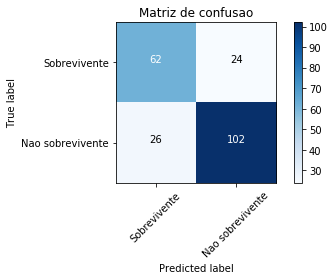

In [308]:
plot_confusion_matrix(cnf_matrix, classes=['Sobrevivente','Nao sobrevivente'],
                      title='Matriz de confusao')

#### Podemos verificar a precisão, o recall, o f1-score usando o relatório de classiicação! 

In [309]:
#print para mostrar o resultado de identificação quão bom foi o modelo e sua precisão
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.80      0.80       128
          1       0.70      0.72      0.71        86

avg / total       0.77      0.77      0.77       214



### Desafios

* ####  Qual o valor curva ROC AUC?

In [ ]:
#O ROC possui dois parâmetros:
#Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives)
Resposta: Positivo/ Positivo  + Falso Positivo
            (0,8*128)/
#Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)
Resposta: Falso Positivo/ Positivo  + Falso Positivo

* #### Plot as features mais importantes 

In [356]:
#lista das features
print("Pclass → Age → SibSp → Parch → Fare → Gender_male → Gender_male")
df.head()

Pclass → Age → SibSp → Parch → Fare → Gender_male → Gender_male


,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Gender_male
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,1,1


In [354]:
#Features importantes em valor
dtc.feature_importances_

array([0.11819133, 0.29196888, 0.04953841, 0.02271113, 0.21307227,
       0.30451797, 0.        ])

In [359]:
#importando uma lib
from pandas import DataFrame

In [362]:
data = {'Pclass': [0.11819133],
        'Age': [0.29196888],
        'SibSp': [0.04953841],
        'Parch:': [0.02271113],
        'Fare:': [0.21307227],
        'Gender_male:':[0.30451797],
        'Gender_male:': [0.        ]}

In [364]:
frame = DataFrame(data)

In [365]:
frame

,Pclass,Age,SibSp,Parch:,Fare:,Gender_male:
0,0.118191,0.291969,0.049538,0.022711,0.213072,0.0


* #### Plot a árvore de decisão